In [3]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Tail Bounds ##

If you know $E(X)$ and $SD(X)$ you can get some idea of how much probability there is in the tails of the distribution of $X$. 

In this section we are going to get upper bounds on probabilities such as the gold area in the graph below. That's $P(X \ge 20)$ for the random variable $X$ whose distribution is displayed in the histogram.

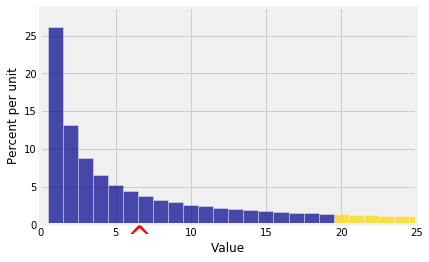

In [33]:
# NO CODE
x = np.arange(1, 26)
probs = (1/x)/sum(1/x)
dist = Table().values(x).probabilities(probs)
Plot(dist, event=np.arange(20, 26), show_ev=True)
plt.xlim(0, 25);

### Monotonicity ###
To do this, we will start with an observation about expectations of functions of $X$.

Suppose $g$ and $h$ are functions such that $g(X) \ge h(X)$, that is, $P(g(X) \ge h(X)) = 1$. Then $E(g(X)) \ge E(h(X))$.

This result is apparent when you notice that for all $\omega$ in the outcome space,

$$
(g \circ X)(\omega) \ge (h \circ X)(\omega) ~~~~ \text{and therefore} ~~~~
(g \circ X)(\omega)P(\omega) \ge (h \circ X)(\omega)P(\omega)
$$

Now suppose $X$ is a non-negative random variable, and let $c$ be a positive number. Consider the two functions $g$ and $h$ graphed below.

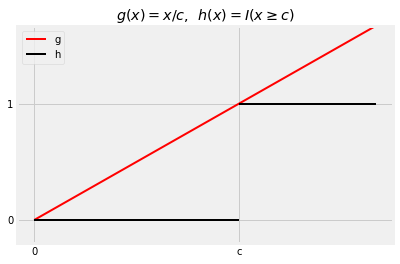

In [57]:
# NO CODE
plt.plot([0, 5], [0, 5/3], lw=2, color='r', label='g')
plt.plot([0, 3], [0, 0], lw=2, color='k')
plt.plot([3, 5], [1, 1], lw=2, color='k', label='h')
plt.legend()
plt.ylim(-0.2, 5/3)
plt.xticks([0, 3], [0, 'c'])
plt.yticks([0, 1]);
plt.title('$g(x) = x/c$,  $h(x) = I(x \geq c)$');

In [ ]:
# VIDEO: Markov's Inequality

The function $h$ is the indicator defined by $h(x) = I(x \ge c)$. So $h(X) = I(X \ge c)$ and $E(h(X)) = P(X \ge c)$.

The function $g$ is constructed so that the graph of $g$ is a straight line that is at or above the graph of $h$ on $[0, \infty)$, with the two graphs meeting at $x = 0$ and $x = c$. The equation of the straight line is $g(x) = x/c$.

Thus $g(X) = X/c$ and hence $E(g(X)) = E(X/c) = E(X)/c$.

By construction, $g(x) \ge h(x)$ for $x \ge 0$. Since $X$ is a non-negative random variable, $P(g(X) \ge h(X)) = 1$.

So

$$
E(X)/c ~ = ~ E(g(X)) ~ \ge ~ E(h(X)) ~ =  ~ P(X \ge c)
$$

We have just proved

### Markov's Inequality ###
Let $X$ be a non-negative random variable. Then for any $c > 0$, 

$$
P(X \ge c) ~ \le ~ \frac{E(X)}{c}
$$

This result is called a "tail bound" because it puts an upper limit on how big the right tail at $c$ can be. It is worth noting that $P(X > c) \le P(X \ge c) \le E(X)/c$ by Markov's bound.

In the figure below, $E(X) = 6.5$ and $c = 20$. Markov's inequality says that the gold area is *at most*

$$
\frac{6.5}{20} = 0.325
$$

You can see that the bound is pretty crude. The gold area is clearly quite a bit less than 0.325.

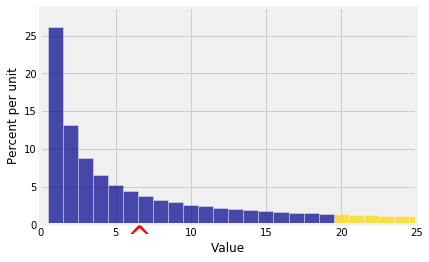

In [35]:
# NO CODE
x = np.arange(1, 26)
probs = (1/x)/sum(1/x)
dist = Table().values(x).probabilities(probs)
Plot(dist, event=np.arange(20, 26), show_ev=True)
plt.xlim(0, 25);

### Another Way of Writing Markov's Inequality ###
Another way to think of Markov's bound is that if $X$ is a non-negative random variable with expectation $\mu_X$, then

$$
P(X \ge k\mu_X) ~ \le ~ \frac{1}{k} ~~~ \text{for all } k > 0
$$

That is, $P(X \ge 2\mu_X) \le 1/2$, $P(X \ge 5\mu_X) \le 1/5$, and so on. The chance that a non-negative random variable is at least $k$ times the mean is at most $1/k$.

**Notes:**
- $k$ need not be an integer. For example, the chance that a non-negative random variable is at least 3.8 times the mean is at most $1/3.8$.
- If $k \le 1$, the inequality doesn't tell you anything you didn't already know. If $k \le 1$ then Markov's bound is 1 or greater. All probabilities are bounded above by 1, so the inequality is true but useless for $k \le 1$. 
- When $k$ is large, the bound does tell you something. You are looking at a probability quite far out in the tail of the distribution, and Markov's bound is $1/k$ which is small.

### Chebyshev's Inequality ###
Markov's bound only uses $E(X)$, not $SD(X)$. To get bounds on tails it seems better to use $SD(X)$ if we can. *Chebyshev's Inequality* does just that. It provides a bound on the two tails outside an interval that is symmetric about $E(X)$ as in the following graph.

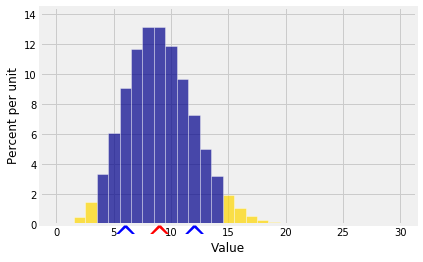

In [36]:
# NO CODE
x = np.arange(31)
poi = stats.poisson.pmf(x, 9)
dist2 = Table().values(x).probabilities(poi)
Plot(dist2, event=np.append(np.arange(4), np.arange(15, 31, 1)), show_ev=True, show_sd=True)

In [ ]:
# VIDEO: Chebyshev's Inequality

The red arrow marks $\mu_X$ as usual, and now the two blue arrows are at a distance of $SD(X)$ on either side of the mean. The gold tails start at the same constant $c$ on either side of $\mu$. We will get an upper bound on the gold area by applying Markov's Inequality to the non-negative random variable $(X - \mu_X)^2$.

$$
\begin{align*}
P\big{(}|X - \mu_X| \ge c\big{)} &= P\big{(}(X-\mu_X)^2 \ge c^2\big{)} \\ \\
&\le \frac{E\big{[}(X-\mu_X)^2\big{]}}{z^2\sigma_X^2} ~~~~~ \text{(Markov's Inequality)}\\ \\
&= \frac{\sigma_X^2}{c^2} ~~~~~ \text{(definition of variance)} 
\end{align*}
$$

The figure below is analogous to the figure drawn earlier to illustrate the derivation of Markov's inequality. 

The graph of the quadratic function $g(x) = (x - \mu_X)^2/c^2$ is always at or above the graph of the indicator function $h(x) = I(\vert x - \mu_X \vert \ge c)$.

Chebyshev's Inequality is just a restatement of the fact that $E(g(X)) ~ \ge ~ E(h(X)) ~ = ~ P(\vert X - \mu_X \vert \ge c)$. 

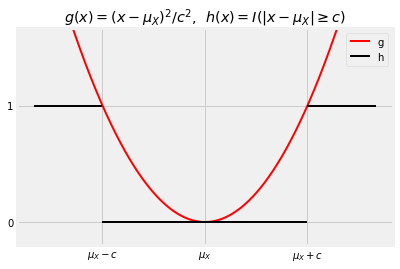

In [4]:
# NO CODE
x = np.arange(-5, 5.01, 0.01)
y = (x**2)/9
plt.plot(x, y, lw=2, color='r', label='g')
plt.plot([-3, 3], [0, 0], lw=2, color='k')
plt.plot([-5, -3], [1, 1], lw=2, color='k')
plt.plot([3, 5], [1, 1], lw=2, color='k', label='h')
plt.legend()
plt.ylim(-0.2, 5/3)
plt.xticks([-3, 0, 3], ['$\mu_X -c$', '$\mu_X$', '$\mu_X +c$'])
plt.yticks([0, 1]);
plt.title('$g(x) = (x - \mu_X)^2/c^2$,  $h(x) = I(|x - \mu_X| \geq c)$');

### Bound on One Tail ###
It is important to remember that Chebyshev's Inequality just provides an upper bound on the total of two tail probabilities. It is not an exact probability or an approximation. The same upper bound applies for a single tail:

$$
P(X - \mu_X \ge c) ~ \le ~ P(|X - \mu_X| \le c) ~ \le ~ \frac{\sigma_X^2}{c^2}
$$

Don't yield to the temptation of dividing the bound by 2. The two tails need not be equal. There is no assumption of symmetry.

### Another Way of Writing Chebyshev's Inequality ###
It is often going to be convenient to think of $E(X)$ as "the origin" and to measure distances in units of SDs on either side.

Thus we can think of the two tails as the event "$X$ is at least $z$ SDs away from $\mu_X$", for some positive $z$. Chebyshev's Inequality says

$$
P(\vert X - \mu_X \vert \ge z\sigma_X) ~ \le ~ \frac{\sigma_X^2}{z^2\sigma_X^2} ~ = ~ \frac{1}{z^2}
$$

This is the form in which you saw Chebyshev's Inequality in Data 8.

Chebyshev's Inequality makes no assumptions about the shape of the distribution. It implies that no matter what the distribution of $X$ looks like,

- $P(\mu_X - 2\sigma_X < X < \mu_X + 2\sigma_X) > 1 - 1/4 = 75\%$

- $P(\mu_X - 3\sigma_X < X < \mu_X + 3\sigma_X) > 1 - 1/9 = 88.88...\%$
- $P(\mu_X - 4\sigma_X < X < \mu_X + 4\sigma_X) > 1 - 1/16 = 93.75\%$
- $P(\mu_X - 5\sigma_X < X < \mu_X + 5\sigma_X) > 1 - 1/25 = 96\%$

That is, *no matter what the shape of the distribution*, the bulk of the probability is in the interval "expected value plus or minus a few SDs".

This is one reason why the SD is a good measure of spread. No matter what the distribution, if you know the expectation and the SD then you have a pretty good sense of where the bulk of the probability is located. 

If you happen to know more about the distribution then of course you can do better than Chebyshev's bound. But in general Chebyshev's bound is as well as you can do without making further assumptions.

In [ ]:
# VIDEO: Standard Units

### Standard Units ###
To formalize the notion of "setting $\mu_X$ as the origin and measuring distances in units of $\sigma_X$, we define a random variable $Z$ called "$X$ in standard units" as follows:

$$
Z = \frac{X - \mu_X}{\sigma_X}
$$

$Z$ measures how far $X$ is above its mean, relative to its SD. In other words, $X$ is $Z$ SDs above the mean:

$$
X = Z\sigma_X + \mu_X
$$

It is important to learn to go back and forth between these two scales of measurement, as we will be using standard units quite frequently. Note that by the linear function rules,

$$
E(Z) = 0 ~~~~ \text{and} ~~~~ SD(Z) = 1
$$

no matter what the distribution of $X$ is.

Also note that because $Var(Z) = 1$, we have

$$
E(Z^2) ~ = ~ Var(Z) + (E(Z))^2 ~ = ~ 1 + 0^2 ~ = ~ 1
$$

Chebyshev's Inequality says

$$
P(|X - \mu_X| \ge z\sigma_X) \le \frac{1}{z^2}
$$

which is the same as saying

$$
P(|Z| \ge z) \le \frac{1}{z^2}
$$

So if you have converted a random variable to standard units, the overwhelming majority of the values of the standardized variable should be in the range $-5$ to $5$. It is possible that there are values outside that range, but it is not likely.